# <center><span lang=EN-US style='color:red'>Intro to Python</span></center> 
## <center><span lang=EN-US style='color:red'>Part II</span></center>
##### <center><a href="http://www.oacn.inaf.it/~brescia/">Massimo Brescia</a></center>

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import pyfits

c:\program files\python37\lib\site-packages\pyfits\__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
fileInput="test"+os.sep+"test0.csv"
start=time.time()
dataset =np.genfromtxt(fileInput, delimiter=",", skip_header=1)  
tempo=time.time()-start
print("tempo usando genfromtxt:"+ str(tempo))

tempo usando genfromtxt:4.3623762130737305


In [3]:
start=time.time()
dataset2 = open(fileInput,"r")
header= dataset2.readline()
corpus=dataset2.readlines()
tempo=time.time()-start
print("tempo usando readlines:"+ str(tempo))

tempo usando readlines:0.15260958671569824


In [4]:
start=time.time()

input_file_t="test"+os.sep+'test0.fit'
data_table, header_table = pyfits.getdata(input_file_t, 1, header=True)
x=data_table
tempo=time.time()-start
print("tempo usando un fits:"+ str(tempo))

tempo usando un fits:0.11214065551757812


c:\program files\python37\lib\site-packages\pyfits\util.py:899: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '


In [6]:
start=time.time()
coloreUG=dataset[:,6]-dataset[:,7]
np.mean(coloreUG)
tempo=time.time()-start
print(tempo)

0.014043092727661133


In [8]:
media=0
start=time.time()
for riga in corpus:
    pezzi=riga.split(',')
    colore=float(pezzi[6])-float(pezzi[7])
    media+=colore
media=media/len(corpus)
tempo=time.time()-start
print(tempo)

0.2492070198059082


In [9]:
media=0
indice=0
start=time.time()
for riga in corpus:
    pezzi=riga.split(',')
    colore=float(pezzi[6])-float(pezzi[7])
    media+=colore
    indice+=1
media=media/indice
tempo=time.time()-start
print(tempo)

0.28981614112854004


In [10]:
start=time.time()
media= np.mean(x.field(7)-x.field(6))
tempo=time.time()-start
print(tempo)

0.00556182861328125


In [34]:
input_file='m101.fits'
im=pyfits.open(input_file)
x=im[0].data


c:\program files\python37\lib\site-packages\pyfits\util.py:899: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '


In [35]:
    minimum =999999
    maximum =-999999
    bias = 0.0
    i = 0
    while i < len(x):
        j=0
        while j < len(x[0]):
           if(x[i][j] < minimum):
               minimum = x[i][j]
           if(x[i][j] > maximum):
               maximum = x[i][j]
           bias = bias + x[i][j]
           j = j + 1
        i = i + 1
    bias = bias / (len(x) * len(x[0]))
print(minimum, maximum, bias)

1507 15752 4795.924268422927


In [36]:
image_stat = open(prefix + "_stat.txt", "w")
image_stat.write("Statistics about " + input_file + ":\n\n")
image_stat.write("Minimum level = " + str(minimum) + "\n")
image_stat.write("Maximum level = " + str(maximum) + "\n")
image_stat.write("Bias = " + str(bias) + "\n")
image_stat.close()
im.info()

Filename: m101.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     125   (530, 530)   int16   
1    Photometric CALTABLE  BinTableHDU     39   16R x 4C     [1D, 1D, 1D, 1J]   


In [37]:
start=time.time()

input_file_t="test"+os.sep+'test0.fit'
data_table, header_table = pyfits.getdata(input_file_t, 1, header=True)
x=data_table
tempo=time.time()-start
print("tempo usando un fits:"+ str(tempo))    

tempo usando un fits:0.06185007095336914


In [38]:
x = np.linspace(0, 3*np.pi, 500)
print(x)

[0.         0.01888733 0.03777466 0.05666199 0.07554932 0.09443665
 0.11332398 0.13221131 0.15109864 0.16998598 0.18887331 0.20776064
 0.22664797 0.2455353  0.26442263 0.28330996 0.30219729 0.32108462
 0.33997195 0.35885928 0.37774661 0.39663394 0.41552127 0.4344086
 0.45329593 0.47218326 0.4910706  0.50995793 0.52884526 0.54773259
 0.56661992 0.58550725 0.60439458 0.62328191 0.64216924 0.66105657
 0.6799439  0.69883123 0.71771856 0.73660589 0.75549322 0.77438055
 0.79326788 0.81215522 0.83104255 0.84992988 0.86881721 0.88770454
 0.90659187 0.9254792  0.94436653 0.96325386 0.98214119 1.00102852
 1.01991585 1.03880318 1.05769051 1.07657784 1.09546517 1.1143525
 1.13323983 1.15212717 1.1710145  1.18990183 1.20878916 1.22767649
 1.24656382 1.26545115 1.28433848 1.30322581 1.32211314 1.34100047
 1.3598878  1.37877513 1.39766246 1.41654979 1.43543712 1.45432445
 1.47321179 1.49209912 1.51098645 1.52987378 1.54876111 1.56764844
 1.58653577 1.6054231  1.62431043 1.64319776 1.66208509 1.680972

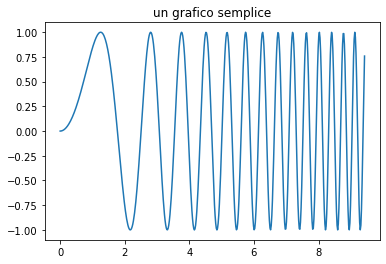

In [39]:
plt.plot(x, np.sin(x**2))
plt.title('un grafico semplice')
plt.show()

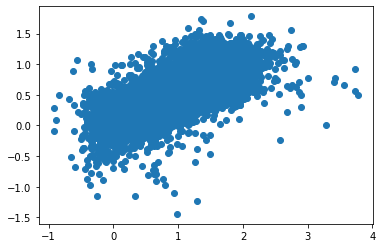

In [40]:
plt.scatter(dataset[:,6]-dataset[:,7],dataset[:,7]-dataset[:,8])
plt.show()

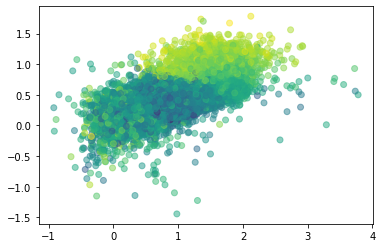

In [41]:
plt.scatter(dataset[:,6]-dataset[:,7],dataset[:,7]-dataset[:,8], c=dataset[:,7], alpha=0.5)
plt.show()

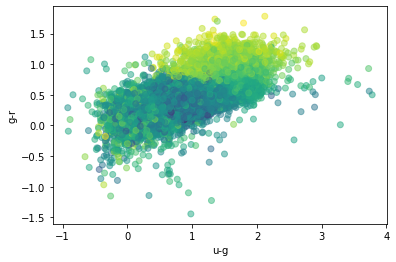

In [42]:
plt.scatter(dataset[:,6]-dataset[:,7],dataset[:,7]-dataset[:,8], c=dataset[:,7], alpha=0.5)
plt.ylabel('g-r')
plt.xlabel('u-g')
plt.show()


In [44]:
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor


In [46]:
print(header)

objid,type,specObjID,ra,dec,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfmagerr_u,psfmagerr_g,psfmagerr_r,psfmagerr_i,psfmagerr_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,fibermagerr_u,fibermagerr_g,fibermagerr_r,fibermagerr_i,fibermagerr_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petromagerr_u,petromagerr_g,petromagerr_r,petromagerr_i,petromagerr_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelmagerr_u,modelmagerr_g,modelmagerr_r,modelmagerr_i,modelmagerr_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,zspec,zspec_err,zWarning,class,subclass,primTarget



In [48]:
indexCol=0
dicHdr={}
splitHdr=header.split(',')
while indexCol<len(splitHdr):
    dicHdr[splitHdr[indexCol]]=indexCol
    indexCol+=1
print(dicHdr['zspec'])


50


In [50]:
numObj=len(dataset)
print(numObj)

100022


In [52]:
rand=np.random.random_sample(numObj)
print(rand,len(rand))
trainList=rand<0.8
testList=rand>=0.8
train=dataset[trainList]
test=dataset[testList]

print(len(train),len(test))

[0.61591814 0.65754192 0.92569734 ... 0.8652777  0.98160936 0.71159868] 100022
80091 19931


In [53]:
xTrain=train[:,[dicHdr['psfMag_u'],dicHdr['psfMag_g'],dicHdr['psfMag_r'],dicHdr['psfMag_i'],dicHdr['psfMag_z']]]
yTrain=train[:,[dicHdr['zspec']]]
xTest=test[:,[dicHdr['psfMag_u'],dicHdr['psfMag_g'],dicHdr['psfMag_r'],dicHdr['psfMag_i'],dicHdr['psfMag_z']]]
yTest=test[:,[dicHdr['zspec']]]

numNeig=20
neigh = KNeighborsRegressor(n_neighbors=numNeig)
neigh.fit(xTrain, yTrain)
out=(neigh.predict(xTest))


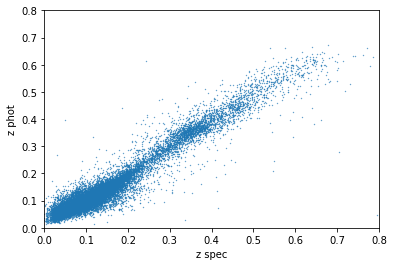

In [54]:
plt.scatter(yTest,out,s=0.1)
plt.ylabel('z phot')
plt.xlabel('z spec')
plt.xlim([0,0.8])
plt.ylim([0,0.8])

plt.show()

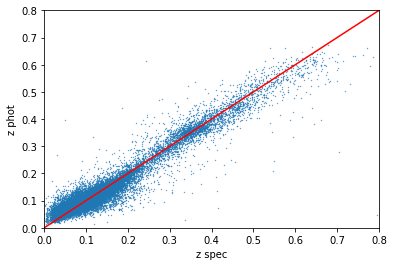

In [55]:
plt.scatter(yTest,out,s=0.1)
plt.ylabel('z phot')
plt.xlabel('z spec')
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.plot([0, 1], [0, 1], 'r-')
plt.show()